In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_excel(r'C:\Users\elbakkali\Desktop\Datasets_Machine_Learning\covid19.xlsx')

In [4]:
df2 = df.copy()

In [5]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

In [6]:
missing_rate = (df.isna().sum()/df.shape[0])

In [7]:
virus_columns = list(df.columns[(missing_rate >= 0.76) & (missing_rate <= 0.77)])

In [8]:
blood_columns = list(df.columns[(missing_rate >= 0.89) & (missing_rate <= 0.91)])

In [9]:
important_columns = ['SARS-Cov-2 exam result', 'Patient age quantile']

In [10]:
data = df[important_columns + blood_columns + virus_columns]

In [11]:
data2 = data.copy()

In [12]:
#after_test_coumns = ['SARS-Cov-2 exam result','Patient age quantile','Platelets', 'Red blood Cells','Leukocytes', 'Eosinophils', 'Monocytes', 'Rhinovirus/Enterovirus', 'Inf A H1N1 2009']

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
trainset, testset = train_test_split(data2, test_size=0.2, random_state=0)

In [16]:
def encodage(df):
    dictionnaire_codes = {   'negative':0,
                             'positive':1,
                             'not_detected':0,
                             'detected':1 }
    
    for col in df.select_dtypes(object):
        df[col] = df[col].map(dictionnaire_codes)
        
    return df  

In [17]:
def imputation(df):
    df = df.dropna(axis=0)
    return df

In [18]:
from sklearn.preprocessing import StandardScaler

In [43]:
age_list = ['Patient age quantile']

In [44]:
age_list

['Patient age quantile']

In [45]:
to_scale_columns = [age_list + blood_columns]

In [46]:
def scalling(df):
    scaller = StandardScaler()
    for col in to_scale_columns:
        df[col] = scaller.fit_transform(df[[col]])
     
    return df

In [50]:
def preprocessing(df):
    #df = scalling(df)
    df = encodage(df)
    df = imputation(df)
    
    X = df.drop('SARS-Cov-2 exam result', axis = 1)
    y = df['SARS-Cov-2 exam result']
    
    print(X.shape)
    print(y.shape)
    
    print(y.value_counts(normalize=True))
    
    return X, y

In [51]:
X_train, y_train = preprocessing(trainset)

(253, 33)
(253,)
0    0.857708
1    0.142292
Name: SARS-Cov-2 exam result, dtype: float64


C:\Users\ELBAKK~1\AppData\Local\Temp/ipykernel_99088/2605850797.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(dictionnaire_codes)


In [52]:
X_test, y_test = preprocessing(testset)

(56, 33)
(56,)
0    0.803571
1    0.196429
Name: SARS-Cov-2 exam result, dtype: float64


C:\Users\ELBAKK~1\AppData\Local\Temp/ipykernel_99088/2605850797.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(dictionnaire_codes)


In [53]:
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
from sklearn.model_selection import learning_curve

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [102]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA

In [120]:
preprocess = make_pipeline(PolynomialFeatures(2, include_bias=False), 
                           SelectKBest(f_classif, k=10))

DTC = make_pipeline(preprocess, DecisionTreeClassifier(random_state=0))
ADABOOST = make_pipeline(preprocess, AdaBoostClassifier(random_state=0))
RF = make_pipeline(preprocess, RandomForestClassifier(random_state=0))
LogisticReg = make_pipeline(preprocess, StandardScaler(), LogisticRegression(random_state=0))
SVM = make_pipeline(preprocess, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocess, StandardScaler(), KNeighborsClassifier())

In [121]:
dictio_models = { 'DTC':DTC,
                 'ADABOOST':ADABOOST,
                 'RF':RF,
                 'LogisticReg':LogisticReg,
                 'SVM':SVM,
                 'KNN':KNN
    
}

In [122]:
def evaluation(model):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    N, train_score, test_score = learning_curve(model, X_train, y_train, cv=4, scoring='f1', train_sizes=np.linspace(0.1,1,10))
    
    
    plt.figure(figsize=(8,6))
    plt.plot(N, train_score.mean(axis=1), label=model)
    plt.plot(N, test_score.mean(axis=1))
    plt.legend()

DTC
[[42  3]
 [ 8  3]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        45
           1       0.50      0.27      0.35        11

    accuracy                           0.80        56
   macro avg       0.67      0.60      0.62        56
weighted avg       0.77      0.80      0.78        56



C:\Users\elbakkali\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  19  24  25  30  32  49  52  57  58  59  63  65  81  84  89  90  95
  97 112 115 120 121 126 128 142 145 150 151 156 158 171 174 179 180 185
 187 199 202 207 208 213 215 226 229 234 235 240 242 252 255 260 261 266
 268 277 280 285 286 291 293 301 304 309 310 315 317 324 327 332 333 338
 340 346 349 354 355 360 362 367 370 375 376 381 383 387 390 395 396 401
 403 406 409 414 415 420 422 424 427 432 433 438 440 441 442 443 444 445
 446 447 448 449 450 451 452 453 454 455 456 457 459 460 461 462 463 464
 465 466 468 469 471 472 473 475 476 478 479 480 481 482 483 484 485 486
 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 504 505
 507 508 509 510 511 512 513 514 515 517 518 519 520 521 522 523 524 525
 526 527 529 530 531 532 533 534 535 536 537 538 540 541 542 543 544 545
 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561 562 563

C:\Users\elbakkali\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  19  23  24  25  26  27  28  30  32  49  52  56  57  58  59  60  61
  63  65  81  84  88  89  90  91  92  93  95  97 112 115 119 120 121 122
 123 124 126 128 142 145 149 150 151 152 153 154 156 158 171 174 178 179
 180 181 182 183 185 187 199 202 206 207 208 209 210 211 213 215 226 229
 233 234 235 236 237 238 240 242 252 255 259 260 261 262 263 264 266 268
 277 280 284 285 286 287 288 289 291 293 301 304 308 309 310 311 312 313
 315 317 324 327 331 332 333 334 335 336 338 340 346 349 353 354 355 356
 357 358 360 362 367 370 374 375 376 377 378 379 381 383 387 390 394 395
 396 397 398 399 401 403 406 409 413 414 415 416 417 418 420 422 424 427
 431 432 433 434 435 436 438 440 441 442 443 444 445 446 447 448 449 450
 451 452 453 454 455 456 457 459 460 461 462 463 464 465 466 467 468 469
 471 472 473 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489

C:\Users\elbakkali\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  19  20  22  23  24  25  26  27  28  30  31  32  49  51  52  53  55
  56  57  58  59  60  61  63  64  65  81  84  85  87  88  89  90  91  92
  93  95  96  97 112 115 116 118 119 120 121 122 123 124 126 127 128 142
 145 146 148 149 150 151 152 153 154 156 157 158 171 174 175 177 178 179
 180 181 182 183 185 186 187 199 202 203 205 206 207 208 209 210 211 213
 214 215 226 229 230 232 233 234 235 236 237 238 240 241 242 252 255 256
 258 259 260 261 262 263 264 266 267 268 277 280 281 283 284 285 286 287
 288 289 291 292 293 301 304 305 307 308 309 310 311 312 313 315 316 317
 324 327 328 330 331 332 333 334 335 336 338 339 340 346 349 350 352 353
 354 355 356 357 358 360 361 362 367 370 371 373 374 375 376 377 378 379
 381 382 383 387 390 391 393 394 395 396 397 398 399 401 402 403 406 409
 410 412 413 414 415 416 417 418 420 421 422 424 427 428 430 431 432 433

ADABOOST
[[40  5]
 [ 7  4]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        45
           1       0.44      0.36      0.40        11

    accuracy                           0.79        56
   macro avg       0.65      0.63      0.63        56
weighted avg       0.77      0.79      0.78        56



C:\Users\elbakkali\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  17  19  22  23  24  25  26  27  28  29  30  31  32  49  50  52  55
  56  57  58  59  60  61  62  63  64  65  81  82  84  87  88  89  90  91
  92  93  94  95  96  97 112 113 115 118 119 120 121 122 123 124 125 126
 127 128 142 143 145 148 149 150 151 152 153 154 155 156 157 158 171 172
 174 177 178 179 180 181 182 183 184 185 186 187 199 200 202 205 206 207
 208 209 210 211 212 213 214 215 226 227 229 232 233 234 235 236 237 238
 239 240 241 242 252 253 255 258 259 260 261 262 263 264 265 266 267 268
 277 278 280 283 284 285 286 287 288 289 290 291 292 293 301 302 304 307
 308 309 310 311 312 313 314 315 316 317 324 325 327 330 331 332 333 334
 335 336 337 338 339 340 346 347 349 352 353 354 355 356 357 358 359 360
 361 362 367 368 370 373 374 375 376 377 378 379 380 381 382 383 387 388
 390 393 394 395 396 397 398 399 400 401 402 403 406 407 409 412 413 414

C:\Users\elbakkali\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  19  24  25  28  30  32  49  50  52  57  58  59  61  63  65  81  84
  89  90  93  95  97 112 115 120 121 124 126 128 142 145 150 151 154 156
 158 171 174 179 180 183 185 187 199 202 207 208 211 213 215 226 229 234
 235 238 240 242 252 255 260 261 264 266 268 277 280 285 286 289 291 293
 301 304 309 310 313 315 317 324 327 332 333 336 338 340 346 349 354 355
 358 360 362 367 370 375 376 379 381 383 387 390 395 396 399 401 403 406
 409 414 415 418 420 422 424 427 432 433 436 438 440 441 442 443 444 445
 446 447 448 449 450 451 452 453 454 455 456 457 459 460 461 462 463 464
 465 466 468 469 470 471 472 473 475 476 478 479 480 481 482 483 484 485
 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 504
 505 507 508 509 510 511 512 513 514 515 517 518 519 520 521 522 523 524
 525 526 527 529 530 531 532 533 534 535 536 537 538 540 541 542 543 544

C:\Users\elbakkali\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  19  23  24  25  26  27  28  30  32  49  52  56  57  58  59  60  61
  63  65  81  84  88  89  90  91  92  93  95  97 112 115 119 120 121 122
 123 124 126 128 142 145 149 150 151 152 153 154 156 158 171 174 178 179
 180 181 182 183 185 187 199 202 206 207 208 209 210 211 213 215 226 229
 233 234 235 236 237 238 240 242 252 255 259 260 261 262 263 264 266 268
 277 280 284 285 286 287 288 289 291 293 301 304 308 309 310 311 312 313
 315 317 324 327 331 332 333 334 335 336 338 340 346 349 353 354 355 356
 357 358 360 362 367 370 374 375 376 377 378 379 381 383 387 390 394 395
 396 397 398 399 401 403 406 409 413 414 415 416 417 418 420 422 424 427
 431 432 433 434 435 436 438 440 441 442 443 444 445 446 447 448 449 450
 451 452 453 454 455 456 457 459 460 461 462 463 464 465 466 467 468 469
 471 472 473 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489

C:\Users\elbakkali\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  19  20  22  23  24  25  26  27  28  30  31  32  49  51  52  53  55
  56  57  58  59  60  61  63  64  65  81  84  85  87  88  89  90  91  92
  93  95  96  97 112 115 116 118 119 120 121 122 123 124 126 127 128 142
 145 146 148 149 150 151 152 153 154 156 157 158 171 174 175 177 178 179
 180 181 182 183 185 186 187 199 202 203 205 206 207 208 209 210 211 213
 214 215 226 229 230 232 233 234 235 236 237 238 240 241 242 252 255 256
 258 259 260 261 262 263 264 266 267 268 277 280 281 283 284 285 286 287
 288 289 291 292 293 301 304 305 307 308 309 310 311 312 313 315 316 317
 324 327 328 330 331 332 333 334 335 336 338 339 340 346 349 350 352 353
 354 355 356 357 358 360 361 362 367 370 371 373 374 375 376 377 378 379
 381 382 383 387 390 391 393 394 395 396 397 398 399 401 402 403 406 409
 410 412 413 414 415 416 417 418 420 421 422 424 427 428 430 431 432 433

C:\Users\elbakkali\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  19  24  25  26  28  30  32  49  52  57  58  59  61  63  65  81  84
  89  90  91  93  95  97 112 115 120 121 122 124 126 128 142 145 150 151
 152 154 156 158 171 174 179 180 181 183 185 187 199 202 207 208 209 211
 213 215 226 229 234 235 236 238 240 242 252 255 260 261 262 264 266 268
 277 280 285 286 287 289 291 293 301 304 309 310 311 313 315 317 324 327
 332 333 334 336 338 340 346 349 354 355 356 358 360 362 367 370 375 376
 377 379 381 383 387 390 395 396 397 399 401 403 406 409 414 415 416 418
 420 422 424 427 432 433 434 436 438 440 441 442 443 444 445 446 447 448
 449 450 451 452 453 454 455 456 457 459 460 461 462 463 464 465 466 467
 468 469 471 472 473 475 476 478 479 480 481 482 483 484 485 486 487 488
 489 490 491 492 493 494 495 496 497 498 499 500 501 502 504 505 507 508
 509 510 511 512 513 514 515 517 518 519 520 521 522 523 524 525 526 527

C:\Users\elbakkali\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  19  22  23  24  25  26  27  28  30  32  49  52  55  56  57  58  59
  60  61  63  65  81  84  87  88  89  90  91  92  93  95  97 112 115 118
 119 120 121 122 123 124 126 128 142 145 148 149 150 151 152 153 154 156
 158 171 174 177 178 179 180 181 182 183 185 187 199 202 205 206 207 208
 209 210 211 213 215 226 229 232 233 234 235 236 237 238 240 242 252 255
 258 259 260 261 262 263 264 266 268 277 280 283 284 285 286 287 288 289
 291 293 301 304 307 308 309 310 311 312 313 315 317 324 327 330 331 332
 333 334 335 336 338 340 346 349 352 353 354 355 356 357 358 360 362 367
 370 373 374 375 376 377 378 379 381 383 387 390 393 394 395 396 397 398
 399 401 403 406 409 412 413 414 415 416 417 418 420 422 424 427 430 431
 432 433 434 435 436 438 440 441 442 443 444 445 446 447 448 449 450 451
 452 453 454 455 456 457 459 460 461 462 463 464 465 466 467 468 469 471

RF
[[42  3]
 [ 7  4]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        45
           1       0.57      0.36      0.44        11

    accuracy                           0.82        56
   macro avg       0.71      0.65      0.67        56
weighted avg       0.80      0.82      0.81        56



C:\Users\elbakkali\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  19  24  25  30  32  49  52  57  58  59  63  65  81  84  89  90  95
  97 112 115 120 121 126 128 142 145 150 151 156 158 171 174 179 180 185
 187 199 202 207 208 213 215 226 229 234 235 240 242 252 255 260 261 266
 268 277 280 285 286 291 293 301 304 309 310 315 317 324 327 332 333 338
 340 346 349 354 355 360 362 367 370 375 376 381 383 387 390 395 396 401
 403 406 409 414 415 420 422 424 427 432 433 438 440 441 442 443 444 445
 446 447 448 449 450 451 452 453 454 455 456 457 459 460 461 462 463 464
 465 466 468 469 471 472 473 475 476 478 479 480 481 482 483 484 485 486
 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 504 505
 507 508 509 510 511 512 513 514 515 517 518 519 520 521 522 523 524 525
 526 527 529 530 531 532 533 534 535 536 537 538 540 541 542 543 544 545
 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561 562 563

C:\Users\elbakkali\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  19  24  25  28  30  32  49  50  52  57  58  59  61  63  65  81  84
  89  90  93  95  97 112 115 120 121 124 126 128 142 145 150 151 154 156
 158 171 174 179 180 183 185 187 199 202 207 208 211 213 215 226 229 234
 235 238 240 242 252 255 260 261 264 266 268 277 280 285 286 289 291 293
 301 304 309 310 313 315 317 324 327 332 333 336 338 340 346 349 354 355
 358 360 362 367 370 375 376 379 381 383 387 390 395 396 399 401 403 406
 409 414 415 418 420 422 424 427 432 433 436 438 440 441 442 443 444 445
 446 447 448 449 450 451 452 453 454 455 456 457 459 460 461 462 463 464
 465 466 468 469 470 471 472 473 475 476 477 478 479 480 481 482 483 484
 485 486 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502
 504 505 506 507 508 509 510 511 512 513 514 515 517 518 519 520 521 522
 523 524 525 526 527 529 530 531 532 533 534 535 536 537 538 540 541 542

C:\Users\elbakkali\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  19  20  22  23  24  25  26  27  28  30  31  32  49  51  52  53  55
  56  57  58  59  60  61  63  64  65  81  84  85  87  88  89  90  91  92
  93  95  96  97 112 115 116 118 119 120 121 122 123 124 126 127 128 142
 145 146 148 149 150 151 152 153 154 156 157 158 171 174 175 177 178 179
 180 181 182 183 185 186 187 199 202 203 205 206 207 208 209 210 211 213
 214 215 226 229 230 232 233 234 235 236 237 238 240 241 242 252 255 256
 258 259 260 261 262 263 264 266 267 268 277 280 281 283 284 285 286 287
 288 289 291 292 293 301 304 305 307 308 309 310 311 312 313 315 316 317
 324 327 328 330 331 332 333 334 335 336 338 339 340 346 349 350 352 353
 354 355 356 357 358 360 361 362 367 370 371 373 374 375 376 377 378 379
 381 382 383 387 390 391 393 394 395 396 397 398 399 401 402 403 406 409
 410 412 413 414 415 416 417 418 420 421 422 424 427 428 430 431 432 433

C:\Users\elbakkali\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  19  24  25  28  30  32  49  52  57  58  59  61  63  65  81  84  89
  90  93  95  97 112 115 120 121 124 126 128 142 145 150 151 154 156 158
 171 174 179 180 183 185 187 199 202 207 208 211 213 215 226 229 234 235
 238 240 242 252 255 260 261 264 266 268 277 280 285 286 289 291 293 301
 304 309 310 313 315 317 324 327 332 333 336 338 340 346 349 354 355 358
 360 362 367 370 375 376 379 381 383 387 390 395 396 399 401 403 406 409
 414 415 418 420 422 424 427 432 433 436 438 440 441 442 443 444 445 446
 447 448 449 450 451 452 453 454 455 456 457 459 460 461 462 463 464 465
 466 468 469 471 472 473 475 476 478 479 480 481 482 483 484 485 486 487
 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 504 505 507
 508 509 510 511 512 513 514 515 517 518 519 520 521 522 523 524 525 526
 527 529 530 531 532 533 534 535 536 537 538 540 541 542 543 544 545 546

C:\Users\elbakkali\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  19  22  23  24  25  26  27  28  30  32  49  52  55  56  57  58  59
  60  61  63  65  81  84  87  88  89  90  91  92  93  95  97 112 115 118
 119 120 121 122 123 124 126 128 142 145 148 149 150 151 152 153 154 156
 158 171 174 177 178 179 180 181 182 183 185 187 199 202 205 206 207 208
 209 210 211 213 215 226 229 232 233 234 235 236 237 238 240 242 252 255
 258 259 260 261 262 263 264 266 268 277 280 283 284 285 286 287 288 289
 291 293 301 304 307 308 309 310 311 312 313 315 317 324 327 330 331 332
 333 334 335 336 338 340 346 349 352 353 354 355 356 357 358 360 362 367
 370 373 374 375 376 377 378 379 381 383 387 390 393 394 395 396 397 398
 399 401 403 406 409 412 413 414 415 416 417 418 420 422 424 427 430 431
 432 433 434 435 436 438 440 441 442 443 444 445 446 447 448 449 450 451
 452 453 454 455 456 457 459 460 461 462 463 464 465 466 467 468 469 471

C:\Users\elbakkali\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  19  24  25  26  30  32  49  52  57  58  59  63  65  81  84  89  90
  91  95  97 112 115 120 121 122 126 128 142 145 150 151 152 156 158 171
 174 179 180 181 185 187 199 202 207 208 209 213 215 226 229 234 235 236
 240 242 252 255 260 261 262 266 268 277 280 285 286 287 291 293 301 304
 309 310 311 315 317 324 327 332 333 334 338 340 346 349 354 355 356 360
 362 367 370 375 376 377 381 383 387 390 395 396 397 401 403 406 409 414
 415 416 420 422 424 427 432 433 434 438 440 441 442 443 444 445 446 447
 448 449 450 451 452 453 454 455 456 457 459 460 461 462 463 464 465 466
 467 468 469 471 472 473 475 476 478 479 480 481 482 483 484 485 486 487
 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 504 505 507
 508 509 510 511 512 513 514 515 517 518 519 520 521 522 523 524 525 526
 527 529 530 531 532 533 534 535 536 537 538 540 541 542 543 544 545 546

C:\Users\elbakkali\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  19  22  24  25  26  27  28  30  32  49  52  55  57  58  59  60  61
  63  65  81  84  87  89  90  91  92  93  95  97 112 115 118 120 121 122
 123 124 126 128 142 145 148 150 151 152 153 154 156 158 171 174 177 179
 180 181 182 183 185 187 199 202 205 207 208 209 210 211 213 215 226 229
 232 234 235 236 237 238 240 242 252 255 258 260 261 262 263 264 266 268
 277 280 283 285 286 287 288 289 291 293 301 304 307 309 310 311 312 313
 315 317 324 327 330 332 333 334 335 336 338 340 346 349 352 354 355 356
 357 358 360 362 367 370 373 375 376 377 378 379 381 383 387 390 393 395
 396 397 398 399 401 403 406 409 412 414 415 416 417 418 420 422 424 427
 430 432 433 434 435 436 438 440 441 442 443 444 445 446 447 448 449 450
 451 452 453 454 455 456 457 459 460 461 462 463 464 465 466 467 468 469
 471 472 473 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489

LogisticReg
[[43  2]
 [ 6  5]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.91        45
           1       0.71      0.45      0.56        11

    accuracy                           0.86        56
   macro avg       0.80      0.71      0.74        56
weighted avg       0.85      0.86      0.84        56



C:\Users\elbakkali\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  17  19  24  25  26  28  30  32  49  50  52  57  58  59  61  63  65
  81  82  84  89  90  91  93  95  97 112 113 115 120 121 122 124 126 128
 142 143 145 150 151 152 154 156 158 171 172 174 179 180 181 183 185 187
 199 200 202 207 208 209 211 213 215 226 227 229 234 235 236 238 240 242
 252 253 255 260 261 262 264 266 268 277 278 280 285 286 287 289 291 293
 301 302 304 309 310 311 313 315 317 324 325 327 332 333 334 336 338 340
 346 347 349 354 355 356 358 360 362 367 368 370 375 376 377 379 381 383
 387 388 390 395 396 397 399 401 403 406 407 409 414 415 416 418 420 422
 424 425 427 432 433 434 436 438 440 441 442 443 444 445 446 447 448 449
 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467
 468 469 470 471 472 473 475 476 477 478 479 480 481 482 483 484 485 486
 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 504 505

C:\Users\elbakkali\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  19  24  25  28  30  32  49  52  57  58  59  61  63  65  81  84  89
  90  93  95  97 112 115 120 121 124 126 128 142 145 150 151 154 156 158
 171 174 179 180 183 185 187 199 202 207 208 211 213 215 226 229 234 235
 238 240 242 252 255 260 261 264 266 268 277 280 285 286 289 291 293 301
 304 309 310 313 315 317 324 327 332 333 336 338 340 346 349 354 355 358
 360 362 367 370 375 376 379 381 383 387 390 395 396 399 401 403 406 409
 414 415 418 420 422 424 427 432 433 436 438 440 441 442 443 444 445 446
 447 448 449 450 451 452 453 454 455 456 457 459 460 461 462 463 464 465
 466 468 469 471 472 473 475 476 477 478 479 480 481 482 483 484 485 486
 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 504 505
 507 508 509 510 511 512 513 514 515 517 518 519 520 521 522 523 524 525
 526 527 529 530 531 532 533 534 535 536 537 538 540 541 542 543 544 545

C:\Users\elbakkali\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  19  24  25  26  28  30  32  49  52  57  58  59  61  63  65  81  84
  89  90  91  93  95  97 112 115 120 121 122 124 126 128 142 145 150 151
 152 154 156 158 171 174 179 180 181 183 185 187 199 202 207 208 209 211
 213 215 226 229 234 235 236 238 240 242 252 255 260 261 262 264 266 268
 277 280 285 286 287 289 291 293 301 304 309 310 311 313 315 317 324 327
 332 333 334 336 338 340 346 349 354 355 356 358 360 362 367 370 375 376
 377 379 381 383 387 390 395 396 397 399 401 403 406 409 414 415 416 418
 420 422 424 427 432 433 434 436 438 440 441 442 443 444 445 446 447 448
 449 450 451 452 453 454 455 456 457 459 460 461 462 463 464 465 466 467
 468 469 471 472 473 475 476 478 479 480 481 482 483 484 485 486 487 488
 489 490 491 492 493 494 495 496 497 498 499 500 501 502 504 505 507 508
 509 510 511 512 513 514 515 517 518 519 520 521 522 523 524 525 526 527

SVM
[[44  1]
 [ 7  4]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        45
           1       0.80      0.36      0.50        11

    accuracy                           0.86        56
   macro avg       0.83      0.67      0.71        56
weighted avg       0.85      0.86      0.83        56



C:\Users\elbakkali\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  19  24  25  30  32  49  52  57  58  59  63  65  81  84  89  90  95
  97 112 115 120 121 126 128 142 145 150 151 156 158 171 174 179 180 185
 187 199 202 207 208 213 215 226 229 234 235 240 242 252 255 260 261 266
 268 277 280 285 286 291 293 301 304 309 310 315 317 324 327 332 333 338
 340 346 349 354 355 360 362 367 370 375 376 381 383 387 390 395 396 401
 403 406 409 414 415 420 422 424 427 432 433 438 440 441 442 443 444 445
 446 447 448 449 450 451 452 453 454 455 456 457 459 460 461 462 463 464
 465 466 468 469 471 472 473 475 476 478 479 480 481 482 483 484 485 486
 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 504 505
 507 508 509 510 511 512 513 514 515 517 518 519 520 521 522 523 524 525
 526 527 529 530 531 532 533 534 535 536 537 538 540 541 542 543 544 545
 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561 562 563

C:\Users\elbakkali\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  19  23  24  25  26  27  28  30  32  49  52  56  57  58  59  60  61
  63  65  81  84  88  89  90  91  92  93  95  97 112 115 119 120 121 122
 123 124 126 128 142 145 149 150 151 152 153 154 156 158 171 174 178 179
 180 181 182 183 185 187 199 202 206 207 208 209 210 211 213 215 226 229
 233 234 235 236 237 238 240 242 252 255 259 260 261 262 263 264 266 268
 277 280 284 285 286 287 288 289 291 293 301 304 308 309 310 311 312 313
 315 317 324 327 331 332 333 334 335 336 338 340 346 349 353 354 355 356
 357 358 360 362 367 370 374 375 376 377 378 379 381 383 387 390 394 395
 396 397 398 399 401 403 406 409 413 414 415 416 417 418 420 422 424 427
 431 432 433 434 435 436 438 440 441 442 443 444 445 446 447 448 449 450
 451 452 453 454 455 456 457 459 460 461 462 463 464 465 466 467 468 469
 471 472 473 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489

C:\Users\elbakkali\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  19  24  25  26  30  32  49  52  57  58  59  63  65  81  84  89  90
  91  95  97 112 115 120 121 122 126 128 142 145 150 151 152 156 158 171
 174 179 180 181 185 187 199 202 207 208 209 213 215 226 229 234 235 236
 240 242 252 255 260 261 262 266 268 277 280 285 286 287 291 293 301 304
 309 310 311 315 317 324 327 332 333 334 338 340 346 349 354 355 356 360
 362 367 370 375 376 377 381 383 387 390 395 396 397 401 403 406 409 414
 415 416 420 422 424 427 432 433 434 438 440 441 442 443 444 445 446 447
 448 449 450 451 452 453 454 455 456 457 459 460 461 462 463 464 465 466
 467 468 469 471 472 473 475 476 478 479 480 481 482 483 484 485 486 487
 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 504 505 507
 508 509 510 511 512 513 514 515 517 518 519 520 521 522 523 524 525 526
 527 529 530 531 532 533 534 535 536 537 538 540 541 542 543 544 545 546

KNN
[[42  3]
 [ 6  5]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        45
           1       0.62      0.45      0.53        11

    accuracy                           0.84        56
   macro avg       0.75      0.69      0.71        56
weighted avg       0.83      0.84      0.83        56



C:\Users\elbakkali\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  17  19  24  25  26  28  30  32  49  50  52  57  58  59  61  63  65
  81  82  84  89  90  91  93  95  97 112 113 115 120 121 122 124 126 128
 142 143 145 150 151 152 154 156 158 171 172 174 179 180 181 183 185 187
 199 200 202 207 208 209 211 213 215 226 227 229 234 235 236 238 240 242
 252 253 255 260 261 262 264 266 268 277 278 280 285 286 287 289 291 293
 301 302 304 309 310 311 313 315 317 324 325 327 332 333 334 336 338 340
 346 347 349 354 355 356 358 360 362 367 368 370 375 376 377 379 381 383
 387 388 390 395 396 397 399 401 403 406 407 409 414 415 416 418 420 422
 424 425 427 432 433 434 436 438 440 441 442 443 444 445 446 447 448 449
 450 451 452 453 454 455 456 457 458 459 460 461 462 463 464 465 466 467
 468 469 470 471 472 473 475 476 477 478 479 480 481 482 483 484 485 486
 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 504 505

C:\Users\elbakkali\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  19  23  24  25  26  27  28  30  32  49  52  56  57  58  59  60  61
  63  65  81  84  88  89  90  91  92  93  95  97 112 115 119 120 121 122
 123 124 126 128 142 145 149 150 151 152 153 154 156 158 171 174 178 179
 180 181 182 183 185 187 199 202 206 207 208 209 210 211 213 215 226 229
 233 234 235 236 237 238 240 242 252 255 259 260 261 262 263 264 266 268
 277 280 284 285 286 287 288 289 291 293 301 304 308 309 310 311 312 313
 315 317 324 327 331 332 333 334 335 336 338 340 346 349 353 354 355 356
 357 358 360 362 367 370 374 375 376 377 378 379 381 383 387 390 394 395
 396 397 398 399 401 403 406 409 413 414 415 416 417 418 420 422 424 427
 431 432 433 434 435 436 438 440 441 442 443 444 445 446 447 448 449 450
 451 452 453 454 455 456 457 459 460 461 462 463 464 465 466 467 468 469
 471 472 473 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489

C:\Users\elbakkali\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  19  22  24  25  26  27  28  30  32  49  52  55  57  58  59  60  61
  63  65  81  84  87  89  90  91  92  93  95  97 112 115 118 120 121 122
 123 124 126 128 142 145 148 150 151 152 153 154 156 158 171 174 177 179
 180 181 182 183 185 187 199 202 205 207 208 209 210 211 213 215 226 229
 232 234 235 236 237 238 240 242 252 255 258 260 261 262 263 264 266 268
 277 280 283 285 286 287 288 289 291 293 301 304 307 309 310 311 312 313
 315 317 324 327 330 332 333 334 335 336 338 340 346 349 352 354 355 356
 357 358 360 362 367 370 373 375 376 377 378 379 381 383 387 390 393 395
 396 397 398 399 401 403 406 409 412 414 415 416 417 418 420 422 424 427
 430 432 433 434 435 436 438 440 441 442 443 444 445 446 447 448 449 450
 451 452 453 454 455 456 457 459 460 461 462 463 464 465 466 467 468 469
 471 472 473 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489

C:\Users\elbakkali\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  19  24  25  26  28  30  32  49  52  57  58  59  61  63  65  81  84
  89  90  91  93  95  97 112 115 120 121 122 124 126 128 142 145 150 151
 152 154 156 158 171 174 179 180 181 183 185 187 199 202 207 208 209 211
 213 215 226 229 234 235 236 238 240 242 252 255 260 261 262 264 266 268
 277 280 285 286 287 289 291 293 301 304 309 310 311 313 315 317 324 327
 332 333 334 336 338 340 346 349 354 355 356 358 360 362 367 370 375 376
 377 379 381 383 387 390 395 396 397 399 401 403 406 409 414 415 416 418
 420 422 424 427 432 433 434 436 438 440 441 442 443 444 445 446 447 448
 449 450 451 452 453 454 455 456 457 459 460 461 462 463 464 465 466 467
 468 469 471 472 473 475 476 477 478 479 480 481 482 483 484 485 486 487
 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 504 505 506
 507 508 509 510 511 512 513 514 515 517 518 519 520 521 522 523 524 525

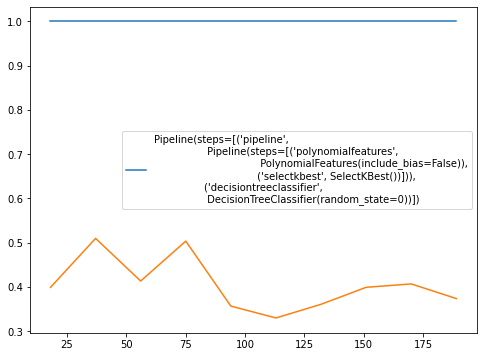

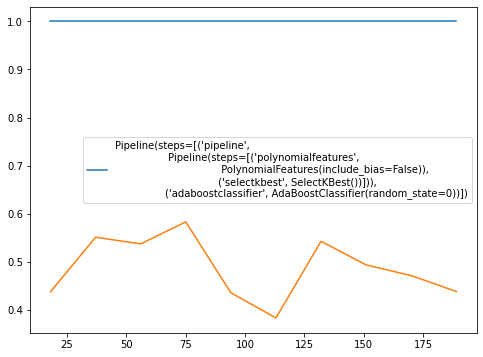

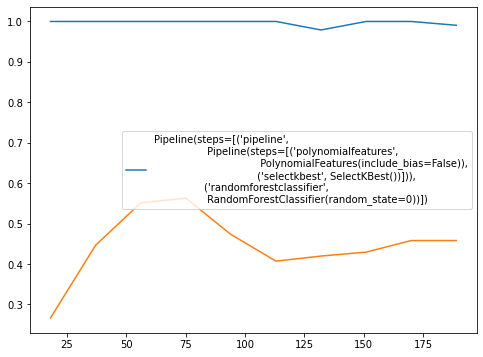

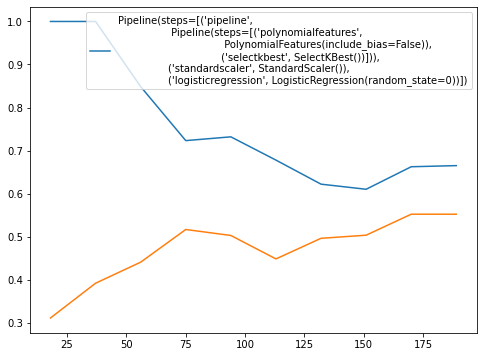

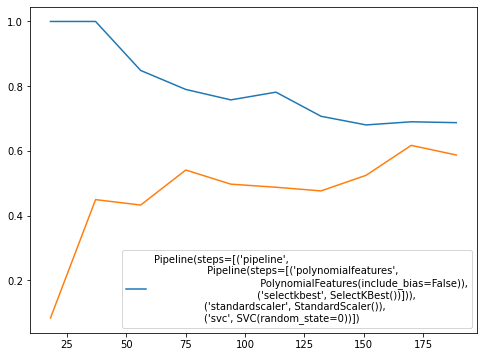

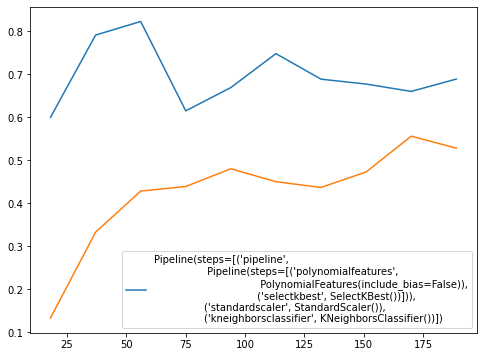

In [123]:
for name, model in dictio_models.items():
    print(name)
    evaluation(model)

In [68]:
DTC.fit(X_train,y_train)

C:\Users\elbakkali\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [ 16  19  24  25  30  32  49  52  57  58  59  63  65  81  84  89  90  95
  97 112 115 120 121 126 128 142 145 150 151 156 158 171 174 179 180 185
 187 199 202 207 208 213 215 226 229 234 235 240 242 252 255 260 261 266
 268 277 280 285 286 291 293 301 304 309 310 315 317 324 327 332 333 338
 340 346 349 354 355 360 362 367 370 375 376 381 383 387 390 395 396 401
 403 406 409 414 415 420 422 424 427 432 433 438 440 441 442 443 444 445
 446 447 448 449 450 451 452 453 454 455 456 457 459 460 461 462 463 464
 465 466 468 469 471 472 473 475 476 478 479 480 481 482 483 484 485 486
 487 488 489 490 491 492 493 494 495 496 497 498 499 500 501 502 504 505
 507 508 509 510 511 512 513 514 515 517 518 519 520 521 522 523 524 525
 526 527 529 530 531 532 533 534 535 536 537 538 540 541 542 543 544 545
 546 547 548 549 550 551 552 553 554 555 556 557 558 559 560 561 562 563

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=0))])

In [ ]:
pd.DataFrame(model.best_estimator_.feature_importances_, index=X_train.columns).plot.bar(figsize=(12,8))